In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import TensorBoardLogger

import gans
from gans import MNISTDataModule, DCGAN

In [2]:
# define the logger object
logger = TensorBoardLogger("gans_logs", name = "DCGAN")

dm = MNISTDataModule(batch_size=128)
model = DCGAN(*dm.size(), spectral_norm=True)
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=50,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=logger,
    check_val_every_n_epoch=5
)
trainer.fit(model, dm)

Epoch 4:  91%|██████████████████████████████████▊   | 430/470 [01:15<00:07,  5.68it/s, loss=1.5, v_num=2, loss/g_loss=2.880, loss/d_loss=0.053]
Validation: 0it [00:00, ?it/s]
Epoch 9:  91%|████████████████████████████████▉   | 430/470 [02:38<00:14,  2.72it/s, loss=0.801, v_num=2, loss/g_loss=0.887, loss/d_loss=0.447]
Validation: 0it [00:00, ?it/s]
Epoch 14:  91%|████████████████████████████████   | 430/470 [03:56<00:22,  1.82it/s, loss=0.735, v_num=2, loss/g_loss=0.885, loss/d_loss=0.574]
Validation: 0it [00:00, ?it/s]
Epoch 19:  91%|████████████████████████████████   | 430/470 [05:12<00:29,  1.38it/s, loss=0.739, v_num=2, loss/g_loss=0.596, loss/d_loss=0.667]
Validation: 0it [00:00, ?it/s]
Epoch 24:  91%|████████████████████████████████   | 430/470 [06:32<00:36,  1.10it/s, loss=0.742, v_num=2, loss/g_loss=0.758, loss/d_loss=0.680]
Validation: 0it [00:00, ?it/s]
Epoch 29:  91%|████████████████████████████████   | 430/470 [07:52<00:43,  1.10s/it, loss=0.741, v_num=2, loss/g_loss=0.711, 

In [3]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    image_grid = make_grid(fake[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [4]:
fake = model.on_validation_epoch_end()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


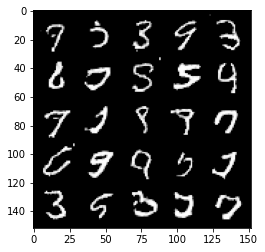

In [5]:
show_tensor_images(fake, num_images=25, size=(1, 28, 28))

In [6]:
# Start tensorboard.
os.environ['TENSORBOARD_BINARY'] = '/.../anaconda3/envs/pytorch/bin/tensorboard'
%load_ext tensorboard
%tensorboard --logdir gans_logs/ --port 8889 --bind_all